In [1]:
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import PIL
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
transforms.ToTensor?

In [4]:
imsize = 200

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])
im1 = Image.open("/home/kush/Desktop/silverback.jpg")

# Important Functions

In [5]:
ImgProc1 = transforms.ToTensor() # Processing 1

ImgProc2 =loader = transforms.Compose([
    transforms.Resize(imsize),  
    transforms.ToTensor()]) # All Processes in order

image1 = ImgProc2(im1) # First image processed (should be PIL)

print type(image1)     # image1 is Tensor

image2 = ImgProc1(im1) # Second 

ImgConv = transforms.ToPILImage() # Converter object for tensors

PIL_im1 = ImgConv(image1) # First Tensor converted to PIL
PIL_im2 = ImgConv(image2)

print image1.size() # new size due to Resize is 200*new_width
print image2.size() # orignal size 

# PIL_im1.show

<class 'torch.Tensor'>
torch.Size([3, 200, 297])
torch.Size([3, 673, 1000])


In [27]:
a = torch.tensor([1,2,3,4])
print a.size()
a = a.view(2,-1)
print a.size()
a = a.unsqueeze(1) # adds dummy dimension at index 1
print a.size()

torch.Size([4])
torch.Size([2, 2])
torch.Size([2, 1, 2])


In [56]:
# Pytorch Basics
x1 = torch.tensor([1], requires_grad=True)
# x1.requires_grad_(requires_grad=True) # if not already set
x2 = torch.tensor([3], requires_grad = True)


In [70]:
if x1.grad is not None:
    x1.grad.zero_()      # first time x1.grad will be None so skip ,
                         # next time it is important to make grads 0
                         # and then redifine whole graph again

if x2.grad is not None:  # Do this for both leaf nodes  
    x2.grad.zero_()
    
    
y = 2*(x1**2) + x2**2
z = y**3
w = z.sum()
# Two leaf nodes x1 and x2
# No other intermediate node can have req_grad = True
w.backward()

# IF retain_graph == False
# our intermediate values of y,z and w get flushed to free up space
# we can not call w.backward again , as it does not have resources 
# to calculate it .
# Therefore , we will need to redifine the whole graph again

In [71]:
print x1.grad
print x2.grad

tensor([ 1452])
tensor([ 2178])


#########################################################
#########################################################
CASE WHEN retain_graph is False
#########################################################
#########################################################

In [72]:
x1 = torch.tensor([1], requires_grad=True)
# x1.requires_grad_(requires_grad=True) # if not already set
x2 = torch.tensor([3], requires_grad = True)

y = 2*(x1**2) + x2**2
z = y**3
w = z.sum()
# Two leaf nodes x1 and x2
# No other intermediate node can have req_grad = True

In [79]:
if x1.grad is not None:
    x1.grad.zero_()      # first time x1.grad will be None so skip ,
                         # next time it is important to make grads 0
                         # and then redifine whole graph again

if x2.grad is not None:  # Do this for both leaf nodes  
    x2.grad.zero_()

w.backward(retain_graph = True)

print x1.grad
print x2.grad

# Here on making retain_graph = True 
# I didn't need to remake/ recalculate graph
# Additionally , I can comment x2.grad and x1.grad if i wish to accumalate 

tensor([ 1452])
tensor([ 2178])


In [80]:
#########################################

In [134]:
# CASE 1
x = torch.tensor([3],requires_grad=True)
y = x
z = y**2

z.backward()
print y.grad # y is just another name for x

tensor([ 6])

In [151]:
# CASE 2 :retain_grad()
x = torch.tensor([3],requires_grad=True)
y = x**2
z = y**2
y.retain_grad()
z.backward()

print y.grad # dz/dy
print x.grad # dz/dx

tensor([ 18])
tensor([ 108])


In [172]:
x = torch.zeros(10,20) 
m = torch.nn.Linear(in_features= 20, out_features= 30 , bias = False)
# m is a matrix of size 20*30 with random values 
print x.size()
print m(x)[:3,:3] # All zeros with bias = False
                  
# If we wanted to find initial weights of all edges
x = x + 1
print '#'*30
print "weights"
print m(x)[:3, :3]
# If we wanted to know initial weight of biases
x = x - 1
m = torch.nn.Linear(in_features= 20, out_features= 30 , bias = True)
print '#'*30
print "biases"
print m(x)[:3,:3]

torch.Size([10, 20])
tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])
##############################
weights
tensor([[-0.0857,  0.8062,  0.2587],
        [-0.0857,  0.8062,  0.2587],
        [-0.0857,  0.8062,  0.2587]])
##############################
biases
tensor([[-0.2029, -0.2079, -0.0282],
        [-0.2029, -0.2079, -0.0282],
        [-0.2029, -0.2079, -0.0282]])


In [175]:
# CASE 2 :retain_grad()
x = torch.tensor([3],requires_grad=True)
y = x.clone()
z = y**2
q = x**2
y.retain_grad()
q.backward()

print y.grad # dz/dy
print x.grad # dz/dx

None
tensor([ 6])


In [160]:
x = torch.nn.Linear?

In [ ]:
x = torch.nn.Linear()

In [176]:
cnn = models.vgg16(pretrained=True).features

In [181]:
# for i in cnn:
#     print isinstance(i,torch.nn.modules.conv.Conv2d)

True
False
True
False
False
True
False
True
False
False
True
False
True
False
True
False
False
True
False
True
False
True
False
False
True
False
True
False
True
False
False


In [201]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = F.softmax(self.out(x))
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) 

In [203]:
for i in net.parameters():
    print i
print net.parameters
# prints 4 matrices

# 1st = 10 * 2 --> 2 input layer * 10 hidden
# 2nd = 1 * 10 --> 1 bias for each node in hidden layer
# 3rd = 10 * 2 --> 10 input hidden layer * 2 output layer
# 4th = 1 * 2 --> 1 bias for each node output layer

#TODO : Read about instancemethod
#TODO : Study bptt( back prop through time ) to 
#       understand why we need to make optimizer zero_() here
 

Parameter containing:
tensor([[-0.5196, -0.3155],
        [ 0.0001, -0.0907],
        [-0.3217, -0.2253],
        [ 0.3643, -0.0637],
        [-0.4628, -0.4719],
        [-0.2935,  0.5907],
        [ 0.0572, -0.6557],
        [-0.3555, -0.0312],
        [-0.5306,  0.4327],
        [-0.3127,  0.2162]])
Parameter containing:
tensor([-0.5295, -0.6759, -0.5870, -0.6399,  0.3817,  0.3991, -0.3413,
         0.3378,  0.3137, -0.2684])
Parameter containing:
tensor([[ 0.0123,  0.2982, -0.0666, -0.0272, -0.0792, -0.2497, -0.2191,
          0.2867, -0.2097, -0.2671],
        [-0.3132,  0.2973,  0.0714,  0.3036,  0.2546, -0.3048,  0.2165,
          0.1221,  0.0846, -0.1101]])
Parameter containing:
tensor([ 0.1184,  0.2469])
<bound method Net.parameters of Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>


In [2]:
nn.MSELoss?

In [10]:
"c" + str(1)

'c1'

In [13]:
x = torch.tensor([1,2], requires_grad = True )
y = x**2
p = y.detach()
q = y.clone()

In [14]:
print x.grad_fn
print y.grad_fn
print p.grad_fn
print q.grad_fn

None
None


In [17]:
nn.Sequential?

In [2]:
import pandas as pd

In [3]:
ds = pd.read_csv("/home/kush/Downloads/mnist_train.csv").values
#  .values imports it as ndarray

In [4]:
ds.shape    
y = ds[:,0]     
im_np = ds[:,1:785]    
im_np = np.reshape(im_np,(-1,28,28)) 
im_np.shape

(42000, 28, 28)

In [5]:
im = Image.fromarray(im_np[0,:,:].astype('uint8') )
im.show()

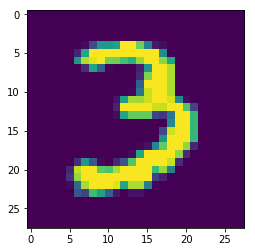

In [15]:
for ix in im_np[0:10,:,:]:
    plt.imshow(ix)
